In [1]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [7]:
#filename_base = "xp2_migr_20180619084743" # 20, 0
#filename_base="xp2_migr_20180619094324" #20,25
#filename_base="xp2_migr_20180618225904" # 20, 50

experiments = glob.glob("./results_xp3_5/*")

df = None
df_migr = None
df_agent = None

for experiment in experiments:
    filename_base = experiment.split("/")[2]
    experiment=filename_base
    #filename_base="xp2_migr_20180621170259_50_0" # 50 agents, 0 active processes (which are going to be migrated)
    #filename_base="xp2_migr_20180623033156_50_25" # 50,25
    #filename_base="xp2_migr_20180623151601_50_50" #50,50
    test_descriptor=None
    split_experiment = filename_base.split("_")
    if len(split_experiment)<6:
        continue
    if experiment.find("xp3") == -1:
        continue
    
    if split_experiment[3] != '100':
        continue
    
    files = glob.glob("./results_xp3_5/{0}/*.csv".format(filename_base))
    print (experiment)
    for f in files:
        
        #print (f)
        filename=os.path.basename(f)
        name = filename.split(".")[0].split("_")
        #print (name)
        if ("_pre_" in filename) or ("_post_" in filename):
            df_tmp = pd.read_csv(f,parse_dates=["start", "end"], sep=",")
            
            df_tmp["experiment"] = filename_base
            df_tmp["agent_nb"] = int(split_experiment[3])
            df_tmp["active_process_nb"] = int(split_experiment[4])
            
            #df_tmp["faban_agent"] = int(name[4])
            df_tmp["tenant"] = name[7]
            df_tmp["bpm"] = split_experiment[5]
            if "_pre_" in filename:
                df_tmp["type"] = "pre"
            if "_post_" in filename:
                df_tmp["type"] = "post"
            df_tmp["taskId"] = df_tmp["task_id"]
            df_tmp["relative_start_tenant"] = (df_tmp["start"] - df_tmp["start"].min()).astype("timedelta64[ms]")
            #df_tmp = df_tmp.set_index(["task_id","type", "agent_nb", "active_process_nb"])
            if df is None:
                df = df_tmp
            else:
                df = pd.concat([df, df_tmp])
        if (len(name) > 4 and (name[6] == "migr")):
            df_tmp = pd.read_csv(f, names = ["ts","nb","duration_disable","duration_move","duration_enable","duration_total"])
            df_tmp["ts"] = pd.to_datetime(df_tmp["ts"])
            df_tmp["experiment"] = filename_base
            
            if df_migr is None:
                df_migr = df_tmp
            else:
                df_migr = pd.concat([df_migr, df_tmp])
        if filename=="test_descriptor.csv":
            with open(f, mode='r') as infile:
                reader = csv.reader(infile)
                test_descriptor = dict((rows[0],rows[1]) for rows in reader)
        if ("_agent" in filename):
            df_tmp = pd.read_csv(f, sep=",", dtype={'taskId':int},parse_dates=["Req_retrieve_Time","Resp_retrieve_Time","Req_Assign_Tim","Resp_Assign_Time","Req_exec_Time","Resp_exec_Time","Retrive_Time","Assign_Time","Exec_Time"])
            df_tmp["experiment"] = filename_base
            if "pre_" in filename:
                df_tmp["type"] = "pre"
            if "post_" in filename:
                df_tmp["type"] = "post"
            #df_tmp["agent_nb"] = int(split_experiment[3])
            #df_tmp["active_process_nb"] = int(split_experiment[4])
            #df_tmp["faban_agent"] = int(name[4])    
            df_tmp["tenant"] = name[8]
            #df_tmp = df_tmp.set_index(["taskId","type", "agent_nb", "active_process_nb"])
            
            if df_agent is None:
                df_agent = df_tmp
            else:
                df_agent = pd.concat([df_agent, df_tmp])
    
    if test_descriptor is not None and df is not None:
        print(test_descriptor["faban_agents"])
        df.loc[(df.experiment == experiment, "faban_agents")] = test_descriptor["faban_agents"]

df

#
#all_data

xp3_migr_13-100_100_0_TestHumanTask
1
xp3_migr_13-100_100_0_M3Process


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:55: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



1
xp3_migr_0-100_100_50_M3Process
1
xp3_migr_12-100_100_0_TestHumanTask
1
xp3_migr_0-100_100_0_additionalApproval
1
xp3_migr_11-100_100_0_TestHumanTask
1
xp3_migr_0-100_100_50_TestHumanTask
1
xp3_migr_0-100_100_100_TestHumanTask
1
xp3_migr_12-100_100_200_M3Process
1
xp3_migr_11-100_100_100_M3Process
1
xp3_migr_13-100_100_100_M3Process
1
xp3_migr_13-100_100_50_TestHumanTask
1
xp3_migr_12-100_100_100_TestHumanTask
1
xp3_migr_11-100_100_200_TestHumanTask
1
xp3_migr_12-100_100_50_TestHumanTask
1
xp3_migr_0-100_100_99_TestHumanTask
1
xp3_migr_13-100_100_100_TestHumanTask
1
xp3_migr_0-100_100_0_TestHumanTask
1
xp3_migr_0-100_100_0_M3Process
1
xp3_migr_11-100_100_200_M3Process
1
xp3_migr_11-100_100_100_TestHumanTask
1
xp3_migr_11-100_100_50_TestHumanTask
1
xp3_migr_12-100_100_200_TestHumanTask
1
xp3_migr_13-100_100_200_TestHumanTask
1
xp3_migr_0-100_100_100_additionalApproval
1
xp3_migr_12-100_100_0_M3Process
1
xp3_migr_10-100_100_0_additionalApproval
1
xp3_migr_0-100_100_50_additionalApprova

Unnamed: 0  active_process_nb  agent_nb            bpm  duration  \
0             0                  0       100  TestHumanTask    1114.0   
1             1                  0       100  TestHumanTask     770.0   
2             2                  0       100  TestHumanTask     894.0   
3             3                  0       100  TestHumanTask    1100.0   
4             4                  0       100  TestHumanTask    1266.0   
5             5                  0       100  TestHumanTask    1706.0   
6             6                  0       100  TestHumanTask    1543.0   
7             7                  0       100  TestHumanTask    1453.0   
8             8                  0       100  TestHumanTask    1417.0   
9             9                  0       100  TestHumanTask    1343.0   
10           10                  0       100  TestHumanTask    1265.0   
11           11                  0       100  TestHumanTask    1064.0   
12           12                  0       100  TestHumanTask    1187.0   
13           13                  0       100  TestHumanTask    1542.0   
14           14                  0       100  TestHumanTask    1519.0   
15           15                  0       100  TestHumanTask    1125.0   
16           16                  0       100  TestHumanTask    1357.0   
17           17                  0       100  TestHumanTask    1727.0   
18           18                  0       100  TestHumanTask    1612.0   
19           19                  0       100  TestHumanTask    1585.0   
20           20                  0       100  TestHumanTask    1358.0   
21           21                  0       100  TestHumanTask    1246.0   
22           22                  0       100  TestHumanTask    1353.0   
23           23                  0       100  TestHumanTask    1159.0   
24           24                  0       100  TestHumanTask    2587.0   
25           25                  0       100  TestHumanTask     887.0   
26           26                  0       100  TestHumanTask    2135.0   
27           27                  0       100  TestHumanTask    2143.0   
28           28                  0       100  TestHumanTask    2533.0   
29           29                  0       100  TestHumanTask    2468.0   
...         ...                ...       ...            ...       ...   
8144       8144                100       100      M3Process       NaN   
8145       8145                100       100      M3Process       NaN   
8146       8146                100       100      M3Process       NaN   
8147       8147                100       100      M3Process       NaN   
8148       8148                100       100      M3Process       NaN   
8149       8149                100       100      M3Process       NaN   
8150       8150                100       100      M3Process       NaN   
8151       8151                100       100      M3Process       NaN   
8152       8152                100       100      M3Process       NaN   
8153       8153                100       100      M3Process       NaN   
8154       8154                100       100      M3Process       NaN   
8155       8155                100       100      M3Process       NaN   
8156       8156                100       100      M3Process       NaN   
8157       8157                100       100      M3Process       NaN   
8158       8158                100       100      M3Process       NaN   
8159       8159                100       100      M3Process       NaN   
8160       8160                100       100      M3Process       NaN   
8161       8161                100       100      M3Process       NaN   
8162       8162                100       100      M3Process       NaN   
8163       8163                100       100      M3Process       NaN   
8164       8164                100       100      M3Process       NaN   
8165       8165                100       100      M3Process       NaN   
8166       8166                100       100      M3Process    

In [8]:
df_migr.index = df_migr["ts"]
df_migr

ts   nb  duration_disable  \
ts                                                                             
2018-07-19 17:06:38.824010 2018-07-19 17:06:38.824010    0          0.235795   
2018-07-19 18:22:52.095327 2018-07-19 18:22:52.095327  267          1.287084   
2018-07-19 11:53:45.377435 2018-07-19 11:53:45.377435   28          1.490364   
2018-07-19 16:41:07.612674 2018-07-19 16:41:07.612674    0          0.799540   
2018-07-19 14:40:37.004406 2018-07-19 14:40:37.004406    0          0.407069   
2018-07-19 16:15:19.765181 2018-07-19 16:15:19.765181    0          0.941597   
2018-07-19 11:23:14.495279 2018-07-19 11:23:14.495279   50          0.667821   
2018-07-19 12:12:38.153984 2018-07-19 12:12:38.153984  601          0.415588   
2018-07-20 05:08:49.500121 2018-07-20 05:08:49.500121  100          0.401235   
2018-07-20 02:06:46.185905 2018-07-20 02:06:46.185905   49          0.922803   
2018-07-20 02:57:19.387724 2018-07-20 02:57:19.387724   49          0.641929   
2018-07-19 22:21:51.786220 2018-07-19 22:21:51.786220   50          0.298769   
2018-07-20 01:15:17.198373 2018-07-20 01:15:17.198373   98          0.590808   
2018-07-20 03:26:32.685269 2018-07-20 03:26:32.685269  200          0.351907   
2018-07-19 21:56:16.005339 2018-07-19 21:56:16.005339  132          0.437986   
2018-07-19 09:54:58.752690 2018-07-19 09:54:58.752690    0          0.508405   
2018-07-20 01:41:06.765522 2018-07-20 01:41:06.765522  100          0.482434   
2018-07-19 10:32:57.303618 2018-07-19 10:32:57.303618  400          0.649162   
2018-07-19 11:03:52.989116 2018-07-19 11:03:52.989116  270          1.626980   
2018-07-20 04:44:05.068245 2018-07-20 04:44:05.068245   85          0.722522   
2018-07-20 00:49:26.645894 2018-07-20 00:49:26.645894   92          0.323745   
2018-07-19 21:30:18.060651 2018-07-19 21:30:18.060651  195          0.415376   
2018-07-20 03:52:12.833622 2018-07-20 03:52:12.833622  200          0.481354   
2018-07-20 04:17:52.135087 2018-07-20 04:17:52.135087  381          0.673294   
2018-07-19 12:27:51.029583 2018-07-19 12:27:51.029583  271          0.635411   
2018-07-19 17:57:38.657228 2018-07-19 17:57:38.657228  306          1.794571   
2018-07-19 15:25:28.409397 2018-07-19 15:25:28.409397    0          0.746204   
2018-07-19 11:38:32.708284 2018-07-19 11:38:32.708284  410          0.753396   
2018-07-19 17:32:07.627421 2018-07-19 17:32:07.627421    0          0.582136   
2018-07-20 02:31:59.895165 2018-07-20 02:31:59.895165  385          1.622542   

                            duration_move  duration_enable  duration_total  \
ts                                                                           
2018-07-19 17:06:38.824010       3.551204         4.363911        8.150910   
2018-07-19 18:22:52.095327       8.459440         5.728952       15.475476   
2018-07-19 11:53:45.377435       5.772456         4.647796       11.910616   
2018-07-19 16:41:07.612674       4.478691         4.954906       10.233137   
2018-07-19 14:40:37.004406       4.816887         4.524218        9.748174   
2018-07-19 16:15:19.765181       3.641514         3.469644        8.052755   
2018-07-19 11:23:14.495279       3.983007         4.746633        9.397461   
2018-07-19 12:12:38.153984       5.990335         4.253567       10.659490   
2018-07-20 05:08:49.500121       4.279178         6.515008       11.195421   
2018-07-20 02:06:46.185905       5.563311         8.097344       14.583458   
2018-07-20 02:57:19.387724       5.009715         6.288964       11.940608   
2018-07-19 22:21:51.786220       3.559960         4.474830        8.333559   
2018-07-20 01:15:17.198373       5.173410         4.554687       10.318905   
2018-07-20 03:26:32.685269       4.882780         3.965692        9.200379   
2018-07-19 21:56:16.005339       3.820160         5.433730        9.691876   
2018-07-19 09:54:58.752690       4.275527         3.449707        8.233639   
2018-07-20 01:41:06.765522       4.504433         2.922522        7.909389   
2018-07-

In [9]:
#df["relative_start"] = (df["start"] - df["start"].min()).astype("timedelta64[ms]")
min_start = pd.to_datetime(df.groupby("experiment")["start"].min())
df_migr["min_start"] = None
df["min_start"] = None

print(min_start)
for ind in min_start.index:
    df.loc[df.experiment == ind, "min_start"] = pd.to_datetime(min_start[ind])

    df_migr.loc[df_migr.experiment == ind, "min_start"]  = pd.to_datetime(min_start[ind])
df_migr["min_start"] = pd.to_datetime(df_migr["min_start"])
df["min_start"] = pd.to_datetime(df["min_start"])
df_migr["relative_start"] = (df_migr["ts"]-df_migr["min_start"]).astype("timedelta64[ms]")
df["relative_start"] = (df["start"]-df["min_start"]).astype("timedelta64[ms]")
df_migr["relative_end"] = df_migr["relative_start"] + df_migr["duration_total"]*1000
df_migr["end_pre"] = None
df_migr["begin_post"] = None
df_migr["end_post"] = None
for experiment in df_migr.experiment:
    print(experiment)
    print(df_migr[df_migr["experiment"] == experiment]["relative_start"])
    print("{0}-{1}".format(experiment, df_migr[df_migr["experiment"] == experiment]["relative_start"].item()))
    dd = df_migr[df_migr["experiment"] == experiment]["relative_start"].item()
    df.loc[(df.tenant=="tenant3")&(df.relative_start<dd), "type"] = "pre"

    m = df_migr[df_migr["experiment"] == experiment]["relative_start"].item()
    df.loc[df.experiment == experiment, "begin_migr"] = m
    m = df_migr[df_migr["experiment"] == experiment]["relative_end"].item()
    df.loc[df.experiment == experiment, "end_migr"] = m
    
    m = df[(df.tenant=="tenant3")&(df.experiment == experiment)&(df.type=="pre")]["relative_start"].min()
    df_migr.loc[(df_migr.experiment == experiment, "begin_pre")] = m
    df.loc[df.experiment == experiment, "begin_pre"] = m
    
    m = df[(df.tenant=="tenant3")&(df.experiment == experiment)&(df.type=="pre")]["relative_start"].max()
    df_migr.loc[(df_migr.experiment == experiment, "end_pre")] = m
    df.loc[df.experiment == experiment, "end_pre"] = m

    m = df[(df.tenant=="tenant3")&(df.experiment == experiment)&(df.type=="post")]["relative_start"].min()
    df_migr.loc[(df_migr.experiment == experiment, "begin_post")] = m
    df.loc[df.experiment == experiment, "begin_post"] = m

    m = df[(df.tenant=="tenant3")&(df.experiment == experiment)&(df.type=="post")]["relative_start"].max()
    df_migr.loc[(df_migr.experiment == experiment, "end_post")] = m
    df.loc[df.experiment == experiment, "end_post"] = m
    

experiment
xp3_migr_0-100_100_0_M3Process              2018-07-19 11:00:44.707
xp3_migr_0-100_100_0_TestHumanTask          2018-07-19 10:29:48.454
xp3_migr_0-100_100_0_additionalApproval     2018-07-19 14:35:45.845
xp3_migr_0-100_100_100_TestHumanTask        2018-07-19 12:09:46.381
xp3_migr_0-100_100_100_additionalApproval   2018-07-19 12:24:52.863
xp3_migr_0-100_100_50_M3Process             2018-07-19 11:50:33.825
xp3_migr_0-100_100_50_TestHumanTask         2018-07-19 11:20:10.914
xp3_migr_0-100_100_50_additionalApproval    2018-07-19 11:35:21.906
xp3_migr_0-100_100_99_TestHumanTask         2018-07-19 09:51:52.480
xp3_migr_10-100_100_0_additionalApproval    2018-07-19 15:20:54.520
xp3_migr_11-100_100_0_M3Process             2018-07-19 17:27:35.708
xp3_migr_11-100_100_0_TestHumanTask         2018-07-19 16:10:53.963
xp3_migr_11-100_100_100_M3Process           2018-07-20 02:02:06.276
xp3_migr_11-100_100_100_TestHumanTask       2018-07-20 00:44:51.128
xp3_migr_11-100_100_200_M3Process    

In [10]:
all_data = pd.merge(df, df_agent, on=["tenant","taskId", "experiment"])
#all_data = pd.merge(df, df_agent, on=["taskId"])

all_data["ready"] = pd.to_datetime(all_data["ready"]/1000, unit="s")

all_data["task_start"] = pd.to_datetime(all_data["task_start"]/1000, unit="s")
all_data["task_ready"] = pd.to_datetime(all_data["task_ready"]/1000, unit="s")
all_data["task_assign"] = pd.to_datetime(all_data["task_assign"]/1000, unit="s")
all_data["task_end"] = pd.to_datetime(all_data["task_end"]/1000, unit="s")
all_data["duration_agent"] = ((all_data["Req_Assign_Tim"] - all_data["Resp_retrieve_Time"]) + (all_data["Req_exec_Time"] - all_data["Resp_Assign_Time"]) + (all_data["Req_retrieve_Time"] - all_data["task_ready"])).astype('timedelta64')
all_data["duration_restricted"] = (all_data["end"] - all_data["start"] - ((all_data["Req_Assign_Tim"] - all_data["Resp_retrieve_Time"]) + (all_data["Req_exec_Time"] - all_data["Resp_Assign_Time"]) + (all_data["Req_retrieve_Time"] - all_data["task_ready"]))).astype('timedelta64[ms]')
all_data["retrieve_duration"] = (all_data["Req_retrieve_Time"] - all_data["task_ready"]).astype('timedelta64[ms]')
#all_data = all_data[all_data["relative_start"] <= 35000]
#all_data = all_data[all_data["tenant"] != "tenant3"]
all_data["bpms_task_exec"]=(all_data["task_end"]-all_data["task_start"]).astype("timedelta64[ms]")
all_data["agentbpm_task_exec"]=(all_data["Resp_exec_Time"]-all_data["Req_retrieve_Time"]).astype("timedelta64[ms]")
all_data["agentbpm_task_exec_restricted"]= all_data["agentbpm_task_exec"] - ((all_data["Req_Assign_Tim"] - all_data["Resp_retrieve_Time"]) + (all_data["Req_exec_Time"] - all_data["Resp_Assign_Time"])).astype('timedelta64[ms]')



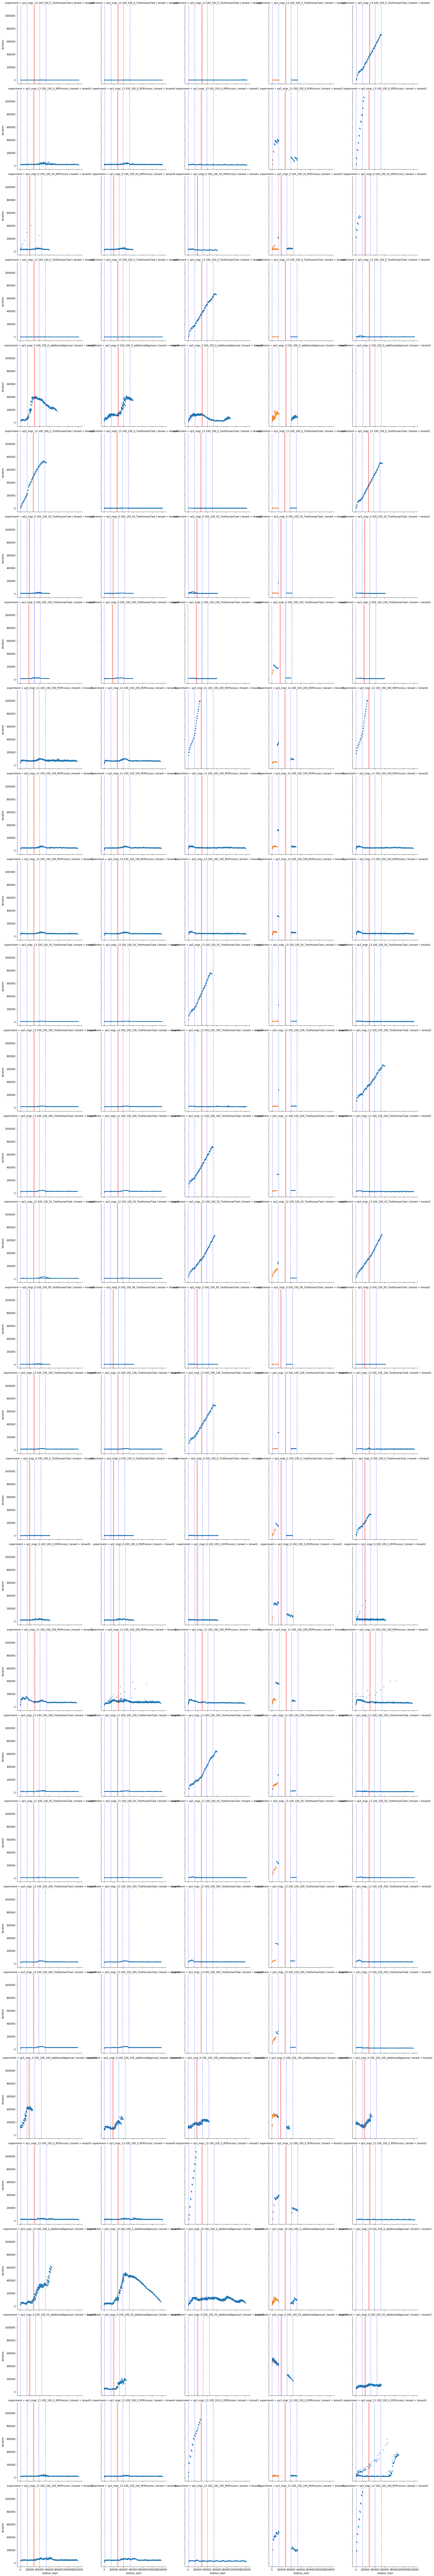

In [11]:
g = sns.FacetGrid(all_data,  row="experiment", col="tenant", hue="type_y", size=5)
g = g.map(plt.scatter, "relative_start", "duration", s=1)
for experiment in df_migr.experiment:
    for i,ax in enumerate(g.axes):
        for j,ax2 in enumerate(ax):
            if experiment in ax2.title.get_text():
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_start"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_end"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["begin_pre"].item(), linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["end_pre"].item(),  linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["begin_post"].item(), linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["end_post"].item(),  linestyle="--",alpha=0.5, color='blue')
            

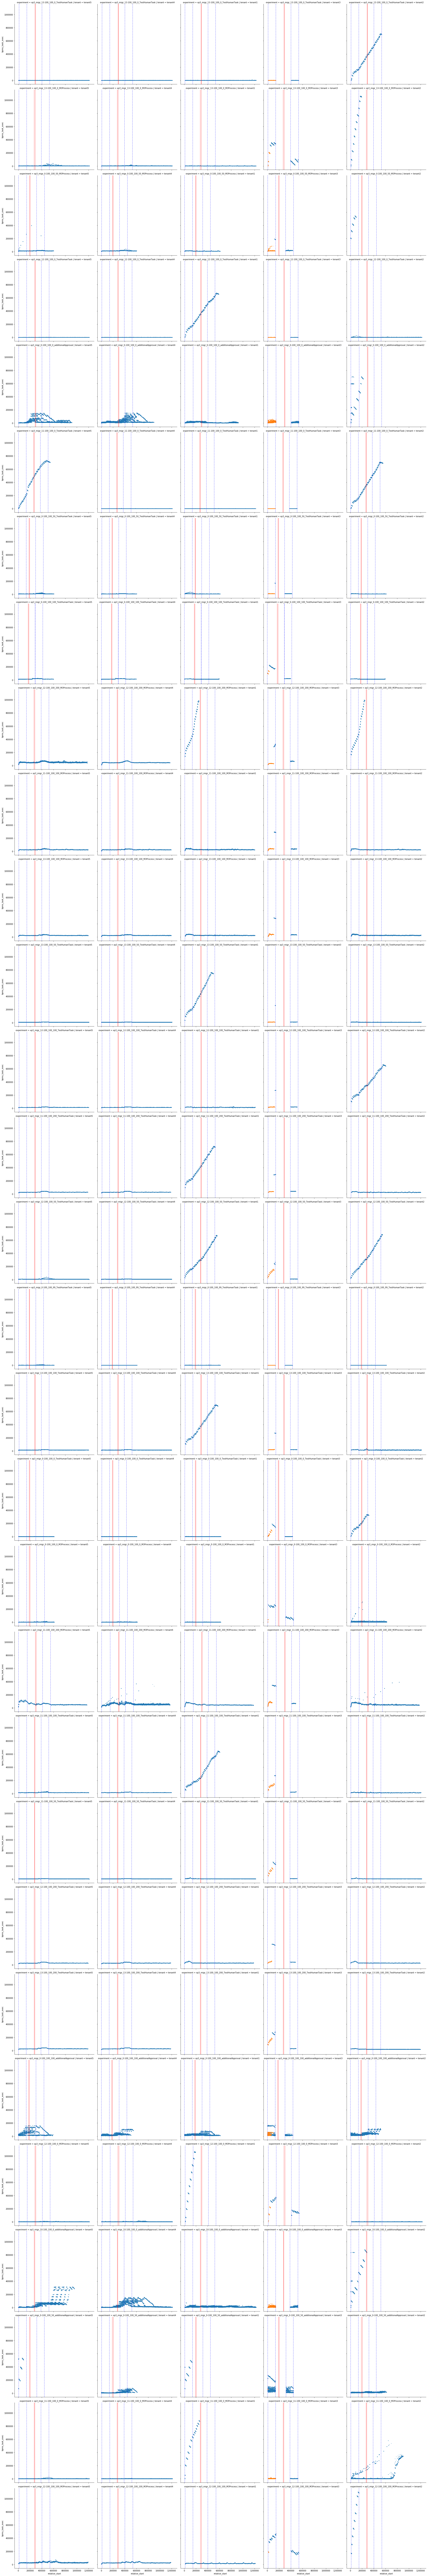

In [12]:
g = sns.FacetGrid(all_data, col="tenant",  row="experiment", hue="type_y", size=6)
g = g.map(plt.scatter, "relative_start", "bpms_task_exec", s=1)
print (g)
for experiment in df_migr.experiment:
    for i,ax in enumerate(g.axes):
        for j,ax2 in enumerate(ax):
            if experiment in ax2.title.get_text():
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_start"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_end"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["begin_pre"].item(), linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["end_pre"].item(),  linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["begin_post"].item(), linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["end_post"].item(),  linestyle="--",alpha=0.5, color='blue')
            

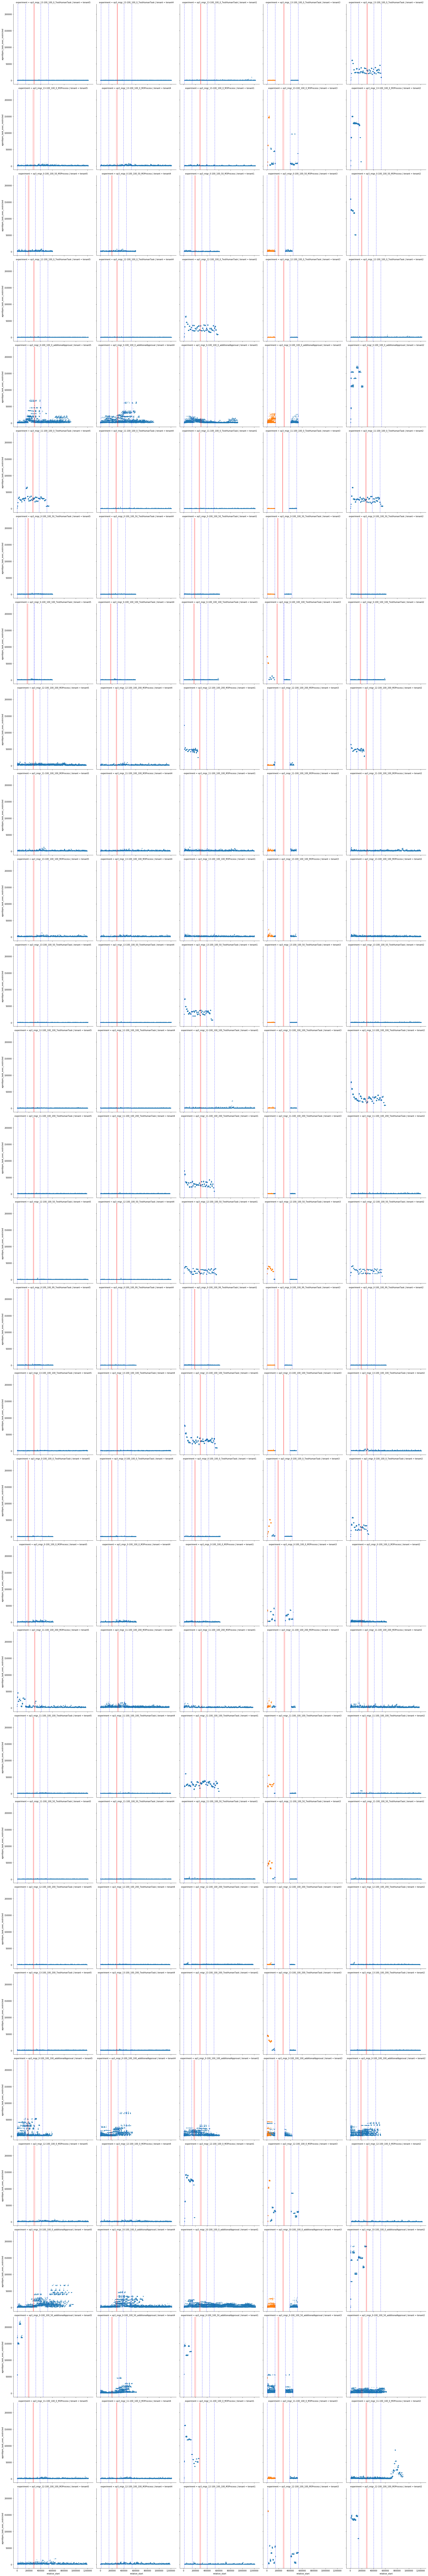

In [13]:
g = sns.FacetGrid(all_data, col="tenant",  row="experiment", hue="type_y", size=6)
g = g.map(plt.scatter, "relative_start", "agentbpm_task_exec_restricted", s=1)
print (g)
for experiment in df_migr.experiment:
    for i,ax in enumerate(g.axes):
        for j,ax2 in enumerate(ax):
            if experiment in ax2.title.get_text():
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_start"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_end"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["begin_pre"].item(), linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["end_pre"].item(),  linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["begin_post"].item(), linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["end_post"].item(),  linestyle="--",alpha=0.5, color='blue')
            

In [14]:
g = sns.FacetGrid(all_data, col="tenant",  row="experiment", hue="type", size=5)
g = (g.map(plt.scatter, "relative_start", "duration"))

KeyError: 'type'

### Pre phasis

In [7]:
print(all_data[(all_data.relative_start>=all_data.begin_pre)&(all_data.relative_start<=all_data.end_pre) ].groupby(["bpm","tenant"])["duration_restricted"].describe())

                             count           mean           std       min  \
bpm                tenant                                                   
M3Process          tenant1  3398.0   69327.118893  61253.615111    7955.0   
                   tenant2  5271.0   13570.324417  92347.427268 -354469.0   
                   tenant3  2103.0   27589.638612  52697.159909  -96173.0   
                   tenant4  3426.0   19457.794804   2171.493544   12538.0   
                   tenant5  3633.0   11250.517479  42293.406240 -366327.0   
TestHumanTask      tenant1  7055.0    5728.142877  12077.323704  -19035.0   
                   tenant2  6881.0   13028.312019  17396.172599  -22211.0   
                   tenant3  4388.0    7579.634002  16034.775454     296.0   
                   tenant4  8883.0    1481.936846    604.116402     517.0   
                   tenant5  9111.0    5188.466250   9362.925236   -2366.0   
additionalApproval tenant1  4625.0   93777.024216  33849.572683  -23449.0   

### Post phasis

In [ ]:
print(all_data[(all_data.relative_start>=all_data.begin_post)&(all_data.relative_start<=all_data.end_post) ].groupby(["tenant", "active_process_nb"])["duration_restricted"].describe())

### Migration

### Post migration

In [ ]:
all_data.groupby(["tenant","experiment", "type"])["Originator"].nunique()

In [ ]:

#f = all_data.set_index(pd.DatetimeIndex(all_data["relative_start"])).resample("1s", how="mean")

#df.resample("1s", how="mean").plot(y="duration", style="ro",ax=ax)
#sns.factorplot(x="start", y="duration", hue="faban_agent", data=df)
#g = sns.FacetGrid(all_data, col="active_process_nb",  row="faban_agent", hue="type")
#g = (g.map(sns.boxplot, "start", "duration"))
sns.factorplot(x="active_process_nb", y="duration_restricted", col="tenant",data=all_data, kind="box", ci="sd")

#df[df["type"] =="pre"].groupby(["faban_agent"]).plot(y="duration", style="ro", ax=ax)
#df[df["type"] =="post"].groupby(["faban_agent"]).plot(y="duration", style="bx",ax=ax)
#df.groupby("faban_agent").resample("1s", how="mean").plot(y="duration", style="ro",ax=ax)
#fig, ax = plt.subplots()
#df[df["type"] =="pre"].groupby(["faban_agent"]).mean().plot(y="duration", ax=ax, label="pre")
#df[df["type"] =="post"].groupby(["faban_agent"]).mean().plot(y="duration", ax=ax, label="post")
#fig, ax = plt.subplots()
#df[df["type"] =="pre"].groupby(["faban_agent"]).std().plot(y="duration", ax=ax, label="pre")
#df[df["type"] =="post"].groupby(["faban_agent"]).std().plot(y="duration", ax=ax, label="post")


In [ ]:
all_data.groupby(["active_process_nb", "tenant"])["duration"].describe()

In [ ]:
all_data.groupby(["faban_agents"])["duration_restricted"].describe()

In [ ]:
all_data["faban_agents"]

In [ ]:
#
all_data["bpms_task_exec"]=(all_data["task_end"]-all_data["task_start"]).astype("timedelta64[ms]")
all_data["agentbpm_task_exec"]=(all_data["Resp_exec_Time"]-all_data["Req_retrieve_Time"]).astype("timedelta64[ms]")

all_data.groupby(["experiment"])[["bpms_task_exec","agentbpm_task_exec"]].describe()
g = sns.FacetGrid(all_data, col="tenant",  row="experiment", hue="type", size=6)
g = g.map(plt.scatter, "relative_start", "bpms_task_exec", s=1)

for experiment in df_migr.experiment:
    for i,ax in enumerate(g.axes):
        for j,ax2 in enumerate(ax):
            if experiment in ax2.title.get_text():
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_start"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_end"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["begin_pre"].item(), linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["end_pre"].item(),  linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["begin_post"].item(), linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["end_post"].item(),  linestyle="--",alpha=0.5, color='blue')
            

In [ ]:
g = sns.FacetGrid(all_data, col="tenant",  row="experiment", hue="type", size=6)
g = g.map(plt.scatter, "relative_start", "agentbpm_task_exec", s=1)

for experiment in df_migr.experiment:
    for i,ax in enumerate(g.axes):
        for j,ax2 in enumerate(ax):
            if experiment in ax2.title.get_text():
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_start"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["relative_end"].item(), alpha=0.5, color='red')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["begin_pre"].item(), linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["end_pre"].item(),  linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["begin_post"].item(), linestyle="--", alpha=0.5, color='blue')
                ax2.axvline(df_migr[df_migr["experiment"] == experiment]["end_post"].item(),  linestyle="--",alpha=0.5, color='blue')
            

In [ ]:
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 0)
pd.set_option('display.expand_frame_repr', False)
print(all_data[(all_data.relative_start>=all_data.begin_migr)&(all_data.relative_start<=all_data.end_migr)].groupby(["experiment", "tenant"])["duration_restricted"].describe(), end='')

In [ ]:
print(all_data[(all_data.relative_start>=all_data.end_migr)&(all_data.relative_start<all_data.begin_post) ].groupby([ "experiment", "tenant"])["duration_restricted"].describe())

In [ ]:
df.groupby("experiment")["duration"].describe()